In [1]:
#!pip install ipython

In [2]:
#!pip install tensorflow --user


In [3]:
#!pip install opencv-python

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_df = pd.read_csv('C:/Users/prana/Desktop/3D/train1.csv')

In [3]:
train_df.head()

,img_path,printer_id,print_id,has_under_extrusion
0,C:/Users/prana/Desktop/3D/images/101/167858973...,101,1678589738,1
1,C:/Users/prana/Desktop/3D/images/101/167858973...,101,1678589738,1
2,C:/Users/prana/Desktop/3D/images/101/167858973...,101,1678589738,1
3,C:/Users/prana/Desktop/3D/images/101/167858973...,101,1678589738,1
4,C:/Users/prana/Desktop/3D/images/101/167858973...,101,1678589738,1


In [4]:
train_df['has_under_extrusion'].unique()

array([1, 0], dtype=int64)

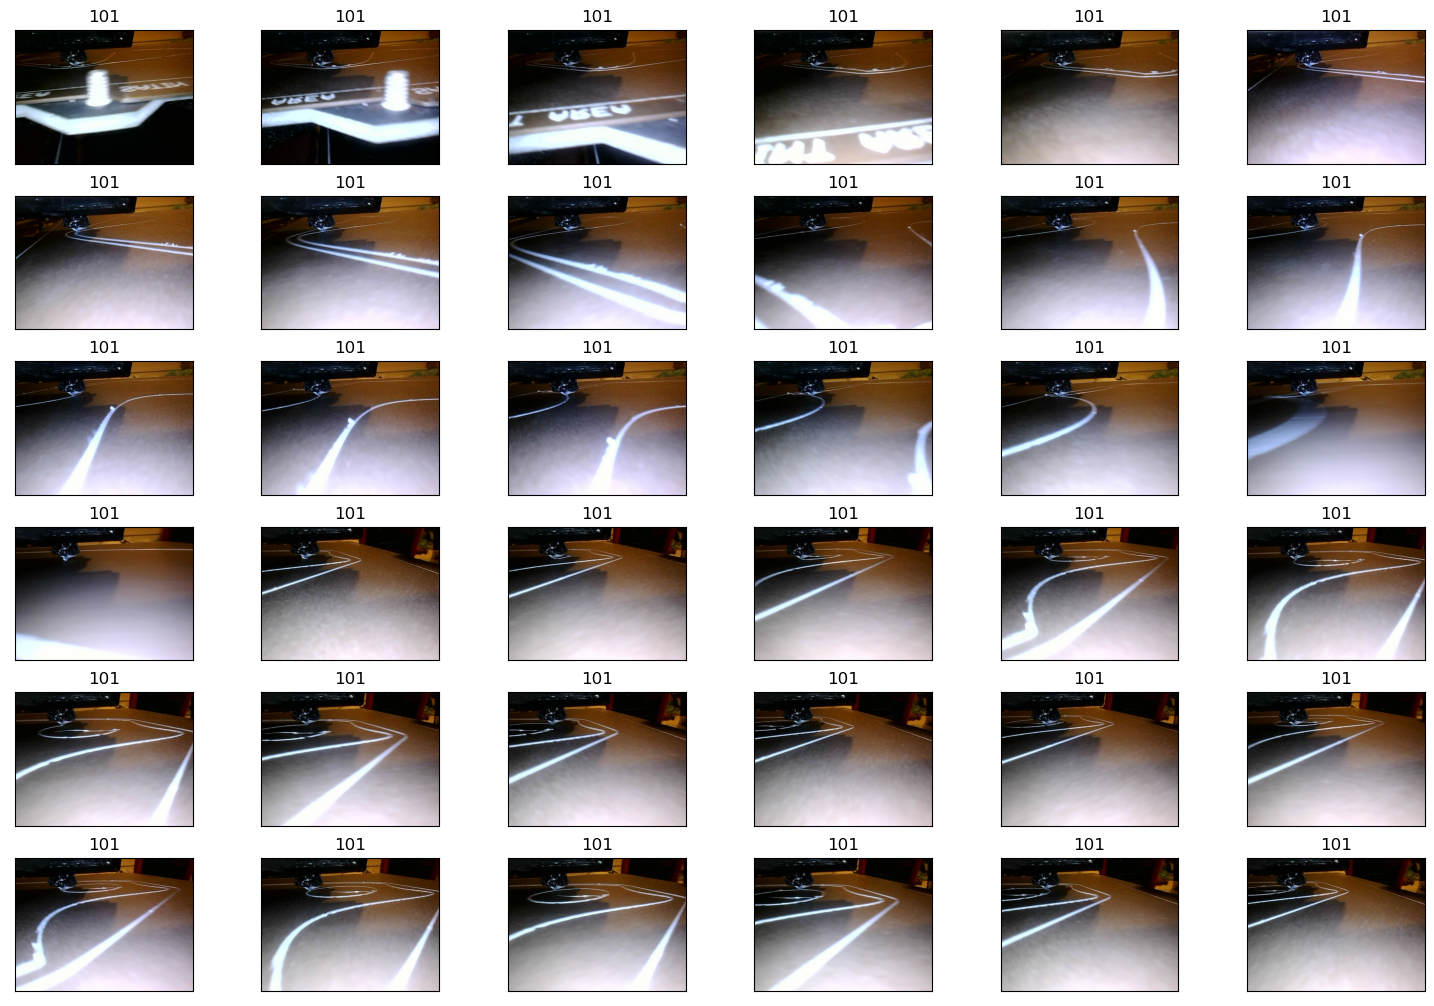

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.img_path[i]))
    ax.set_title(train_df.printer_id[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [7]:
train_idx=list(range(len(train_df['img_path'])))

In [8]:
random.seed(1)
random_sample = random.sample(train_idx,16)

random_sample

[17611,
 74606,
 8271,
 33432,
 15455,
 64937,
 58915,
 61898,
 49756,
 27519,
 12302,
 63944,
 3715,
 51093,
 56723,
 79618]

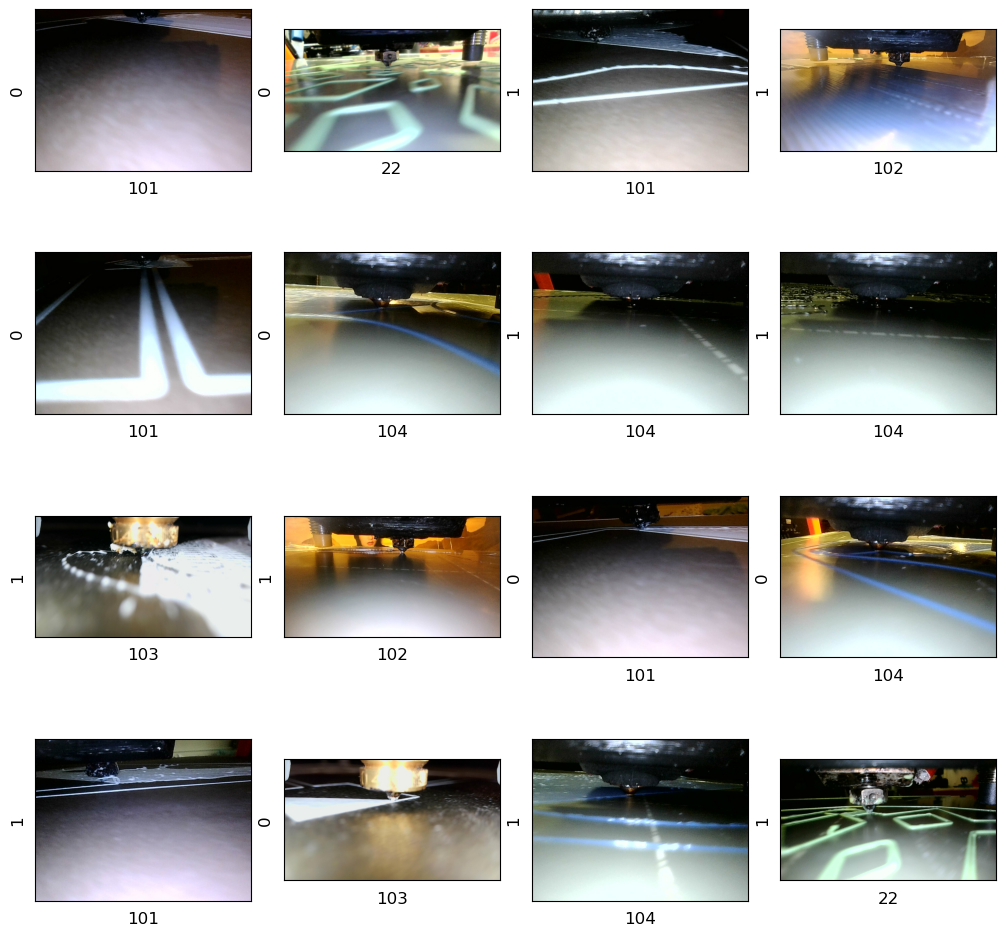

In [9]:
plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(train_df.img_path[random_sample[i]]))
    plt.xlabel(train_df.printer_id[random_sample[i]], fontsize = 12)
    plt.ylabel(train_df.has_under_extrusion[random_sample[i]], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

We can clearly see that the images are of different dimension.

In [4]:
import cv2

im = cv2.imread(train_df['img_path'][1])
im.shape

(480, 640, 3)

In [6]:
#resizing of images
import os
from PIL import Image

input_dir = "C:/Users/prana/Desktop/3D/images"
output_dir = "C:/Users/prana/Desktop/3D/images_resized_224"
target_size = (224,224)  # desired width and height of the resized images

# loop over all files and directories in the input directory
for root, dirs, files in os.walk(input_dir):
    # construct the output subdirectory
    relative_path = os.path.relpath(root, input_dir)
    output_subdir = os.path.join(output_dir, relative_path)
    os.makedirs(output_subdir, exist_ok=True)

    # loop over all image files in the current directory
    for filename in files:
        # check if the file is an image file
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # construct the input and output paths
            input_path = os.path.join(root, filename)
            output_path = os.path.join(output_subdir, filename)
            
            # open the image and resize it
            with Image.open(input_path) as img:
                img = img.resize(target_size, Image.ANTIALIAS)
                img.save(output_path)


C:\Users\prana\AppData\Local\Temp\ipykernel_29908\1963255976.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [12]:
train_df['img_path_resized'] = train_df['img_path'].str.replace('images','images_resized')

In [26]:
train_df["has_under_extrusion"] = train_df["has_under_extrusion"].apply(str)
train_df["print_id"] = train_df["print_id"].apply(str)
train_df["printer_id"] = train_df["printer_id"].apply(str)

In [60]:
train_df.to_csv('check.csv')

In [54]:
train_df.isnull().sum()

img_path               0
printer_id             0
print_id               0
has_under_extrusion    0
img_path_resized       0
dtype: int64

In [57]:
train_df.dtypes

img_path               object
printer_id             object
print_id               object
has_under_extrusion    object
img_path_resized       object
dtype: object

In [28]:
im = cv2.imread(train_df['img_path_resized'][1])
im.shape


(180, 180, 3)

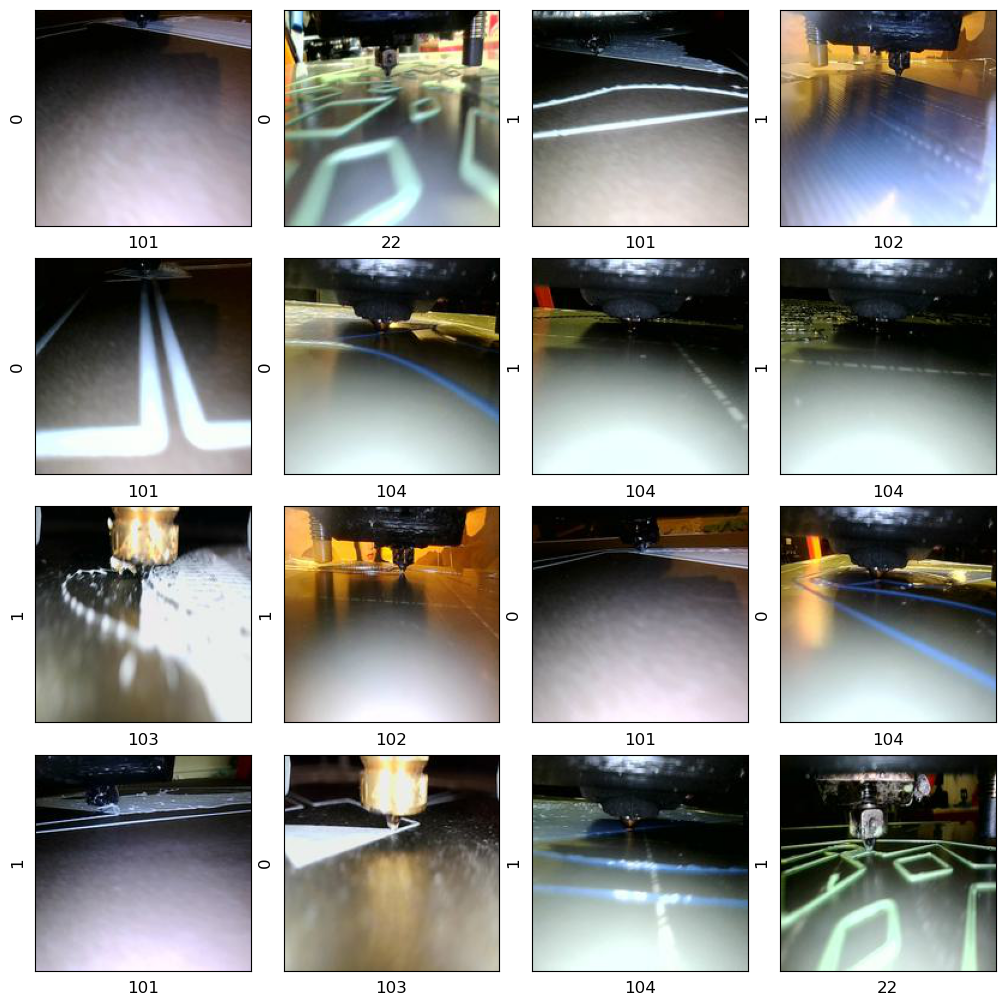

In [29]:
plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(train_df.img_path_resized[random_sample[i]]))
    plt.xlabel(train_df.printer_id[random_sample[i]], fontsize = 12)
    plt.ylabel(train_df.has_under_extrusion[random_sample[i]], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()